In [15]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
#Importing packages needed for the model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [16]:
try:
    df1 = pd.read_csv('./Training_Data/sclerochronology_training_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [3]:
try:
    df2 = pd.read_csv('./Training_Data/sclerochronology_training_2.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [4]:
try:
    df3 = pd.read_csv('./Training_Data/sclerochronology_training_3.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [5]:
try:
    df4 = pd.read_csv('./Training_Data/sclerochronology_training_4.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [6]:
try:
    df5 = pd.read_csv('./Training_Data/sclerochronology_training_5.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [7]:
try:
    df6 = pd.read_csv('./Training_Data/sclerochronology_training_6.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [8]:
try:
    df7 = pd.read_csv('./Training_Data/sclerochronology_training_7.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [9]:
try:
    df8 = pd.read_csv('./Training_Data/sclerochronology_training_8.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [10]:
try:
    df9 = pd.read_csv('./Training_Data/sclerochronology_training_9.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [11]:
df1.head()


,master_chronology1,61261
year,,
649,1.936838,NaN
650,1.605328,NaN
651,1.079118,NaN
652,0.424857,NaN
653,-0.415379,NaN


<AxesSubplot:xlabel='year'>

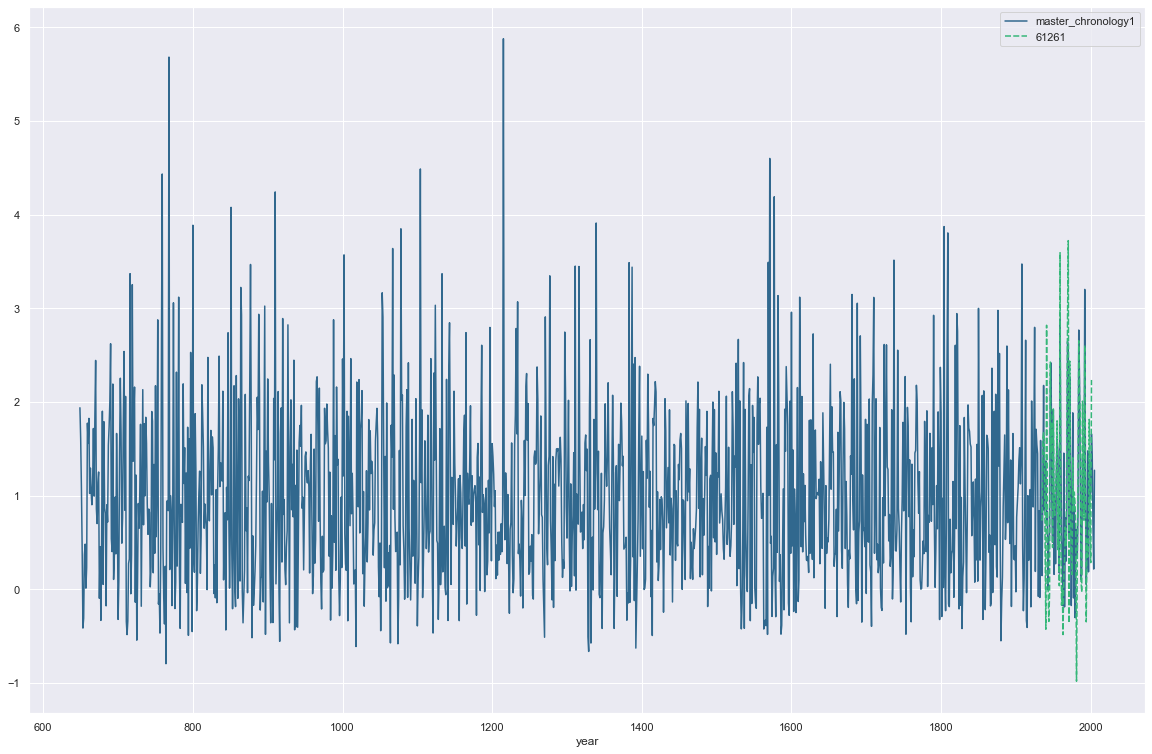

In [12]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df1, palette='viridis')

In [3]:
samples = []
i= 0
for col in df1.columns:
    col_list = df1[col].to_numpy()
    new_array =  col_list[~np.isnan(col_list)]
    samples.append(new_array)
    
final = np.array(np.concatenate((samples[0], samples[1])))
master, sample = df1.apply(pd.Series.first_valid_index)
print(master,sample)
lag = sample-master
print(sample-master)
print(final)
print(samples)

NameError: name 'df1' is not defined

In [20]:
samples = []
i= 0
for col in df1.columns:
    col_list = df1[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
segments = {}
size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[0]))

#Concatenate all of the values of the dictionaries into one list
#Work out where the correlations are
#Put this into binary classification model

1348


In [14]:
samples = []
i = 0

sample_length = df1['61261'].notnull().sum()
for i in range(len(df1)+1-sample_length):
    name = str('master_sample'+ str(i))
    df1[name] = df1.iloc[0+i:sample_length+i, 0]
    i+=1

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1070317026.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [15]:
df1.tail()

,master_chronology1,61261,master_sample0,master_sample1,master_sample2,master_sample3,master_sample4,master_sample5,master_sample6,master_sample7,...,master_sample1280,master_sample1281,master_sample1282,master_sample1283,master_sample1284,master_sample1285,master_sample1286,master_sample1287,master_sample1288,master_sample1289
year,,,,,,,,,,,,,,,,,,,,,
2001,1.657925,2.233491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.657925,1.657925,1.657925,1.657925,1.657925
2002,1.434835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.434835,1.434835,1.434835,1.434835
2003,0.682095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682095,0.682095,0.682095
2004,0.214842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214842,0.214842
2005,1.269459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269459


In [16]:
df2.head()

,master_chronology1,61258
year,,
649,1.936838,NaN
650,1.605328,NaN
651,1.079118,NaN
652,0.424857,NaN
653,-0.415379,NaN


In [17]:
samples2 = []
i= 0
for col in df2.columns:
    col_list2 = df2[col].to_numpy()
    new_array2 =  col_list2[~np.isnan(col_list2)]
    samples2.append(new_array2)
final2 = np.array(np.concatenate((samples2[0], samples2[1])))
master2, sample2 = df2.apply(pd.Series.first_valid_index)
print(master2,sample2)
lag2 = sample2-master2
print(sample2-master2)
print(final2)
print(samples2)

649 1940
1291
[1.93683848 1.60532843 1.07911809 ... 0.75389583 1.60591463 1.65567729]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.30893636,  1.92461324, -0.10128158,  2.60503637,  1.69930493,
        0.02709865,  1.58987678, -1.04034895,  1.64738557,  0.19361599,
        2.07737119,  0.41749129,  1.06660292,  1.15947578,  1.8757913 ,
        2.76629156,  0.95220157,  0.8789872 , -0.12053435,  1.2179585 ,
        1.13660985,  0.39285607,  0.52876375, -0.08573167,  1.63668155,
       -0.16299186,  0.52801627, -0.00816036,  1.06884308,  3.38442577,
        3.28449957,  0.46309398,  2.24448681,  1.25237426, -0.20486143,
       -0.19144913,  1.10937831,  1.29377011,  0.43839752, -0.2815017 ,
        0.25655683,  0.30403835,  0.74947869,  0.64903207,  2.87075658,
        2.89883972,  1.81719959,  0.79139486, -0.27364955,  0.81981288,
        1.01315917,  1.1372591 ,  3.03595768,  1.34824492, -0.67629895,
        0.27196463,  1.08101

In [18]:
samples2 = []
i = 0

sample_length = df2['61258'].notnull().sum()
for i in range(len(df2)+1-sample_length):
    name = str('master_sample'+ str(i))
    df2[name] = df1.iloc[0+i:sample_length+i, 0]
    i+=1

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[name] = df1.iloc[0+i:sample_length+i, 0]
/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_97365/1608402609.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [19]:
samples3 = []
i= 0
for col in df3.columns:
    col_list3 = df3[col].to_numpy()
    new_array3 =  col_list3[~np.isnan(col_list3)]
    samples3.append(new_array3)
final3 = np.array(np.concatenate((samples3[0], samples3[1])))
master3, sample3 = df3.apply(pd.Series.first_valid_index)
print(master3,sample3)
lag3 = sample3-master3
print(sample3-master3)
print(final3)
print(samples3)

649 1883
1234
[1.93683848 1.60532843 1.07911809 ... 0.21740233 1.80238863 1.25018456]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.53594337,  1.21204073,  1.85074507,  0.54527859,  0.74117546,
        2.17131875,  0.54694384,  2.0592618 ,  1.20552057,  0.6129019 ,
        1.10363151, -0.5671537 ,  0.30293405,  1.31105537,  0.08328097,
        0.04367535,  0.72739822, -0.32376723,  0.71806304,  1.06579763,
        1.16214893,  1.47609143,  2.69583813,  2.5588038 ,  1.81960603,
        3.59875081,  0.11129135, -0.47863305,  0.12607481,  1.10195309,
        1.96963312, -0.64873046, -0.53048672,  1.49906896, -0.37406963,
        0.42375272,  0.52182966, -0.24728452,  1.77543592,  0.78805707,
        0.85021389,  2.56947988,  3.75343031,  0.83712353,  0.8951191 ,
        1.67131367,  1.36932374,  0.16263536,  0.12177225, -0.03225022,
        1.15733933, -0.16128714, -0.0701001 ,  1.01901206,  2.38488926,
        1.59898158,  3.24829

In [20]:
samples4 = []
i= 0
for col in df4.columns:
    col_list4 = df4[col].to_numpy()
    new_array4 =  col_list4[~np.isnan(col_list4)]
    samples4.append(new_array4)
final4 = np.array(np.concatenate((samples4[0], samples4[1])))
master4, sample4 = df4.apply(pd.Series.first_valid_index)
print(master4,sample4)
lag4 = sample4-master4
print(sample4-master4)

print(samples4)

649 1953
1304
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.30369199,  0.71363497,  1.91930983,  1.42071431,  0.56746501,
        0.61640617,  0.24302275,  2.62642084,  0.94175396,  1.26650946,
        0.72699651,  1.8471018 , -0.649051  ,  1.50804401,  0.40887684,
        1.46091905,  2.37850139,  2.38402152,  0.02692984,  1.23754116,
        0.7490136 , -0.27193852, -0.05517255,  1.889702  ,  0.15624818,
        0.32296968,  0.26103304,  0.96890584,  1.66767889,  0.47415861,
        1.36085606,  2.45312208,  1.85000237,  2.24480317, -0.52783204,
       -0.55447534,  1.37733567,  1.14057189,  0.31166781,  3.14345022,
        1.05843336, -0.92943004,  1.10265188,  1.33048589,  1.35131539,
        1.09263936,  0.9011341 ,  0.45193424,  3.27510321,  2.22823576,
        0.41789094, -1.19130515])]


In [21]:
samples5 = []
i= 0
for col in df5.columns:
    col_list5 = df5[col].to_numpy()
    new_array5 = col_list5[~np.isnan(col_list5)]
    samples5.append(new_array5)
final5 = np.array(np.concatenate((samples5[0], samples5[1])))
master5, sample5 = df5.apply(pd.Series.first_valid_index)
print(master5,sample5)
lag5 = sample5-master5
print(sample5-master5)
print(final5)
print(samples5)

649 1959
1310
[1.93683848 1.60532843 1.07911809 ... 2.77929156 0.82487058 0.29950547]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 2.22611689,  0.79248555,  0.72793861,  0.15453373,  0.10131479,
        1.87372453, -0.06328313,  1.66356866, -0.61595021,  1.63568724,
        2.89800102,  1.78298578,  1.10200538,  2.03094914,  1.00935619,
        0.26999265,  0.40697499,  1.27922577,  0.0470617 ,  0.008476  ,
       -0.11886344,  0.56133649,  1.72191734, -0.08610724,  0.80062124,
        2.56881972,  2.87172448,  1.60259376,  0.80038889,  0.1737566 ,
        2.96164092,  0.48694835,  0.84196151,  1.45817928,  0.30809306,
       -1.12951603,  0.17456772,  0.91392301,  0.13129613,  2.39111327,
        1.73527538,  0.59549667,  2.77929156,  0.82487058,  0.29950547])]


In [22]:
samples6 = []
i= 0
for col in df6.columns:
    col_list6 = df6[col].to_numpy()
    new_array6 = col_list6[~np.isnan(col_list6)]
    samples6.append(new_array6)
final6 = np.array(np.concatenate((samples6[0], samples6[1])))
master6, sample6 = df6.apply(pd.Series.first_valid_index)
print(master6,sample6)
lag6 = sample6-master6
print(sample6-master6)
print(final6)
print(samples6)

649 1947
1298
[1.93683848 1.60532843 1.07911809 ... 0.69800733 1.44020284 1.51948246]
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 1.74503295,  0.64955342,  0.47709071,  1.73874582,  0.15283496,
        0.36639882,  0.65238036,  1.35414746,  2.00835223,  1.26684218,
        1.03940701,  0.55363755,  2.39496995,  1.92528626,  0.67562393,
        0.15408127, -0.36848881,  0.72267018, -0.452113  ,  0.78248039,
        0.47155779,  1.60535123,  3.32546431,  2.57215936,  0.26323977,
        1.66852619,  1.40516726, -0.30149448, -0.27032027,  2.19814424,
        0.85946467,  0.32804357, -0.33406602,  0.74483489,  0.36210504,
        0.37636248,  2.5544792 ,  2.33367091,  2.33675617,  1.63733949,
       -0.03420367, -0.63780645,  0.97162567,  0.9364158 ,  0.42499949,
        4.25137971,  1.44475015, -0.38319032,  0.15547344,  0.94675744,
        0.09259192,  1.49517425,  0.7026205 ,  0.69800733,  1.44020284,
        1.51948246])]


In [23]:
samples7 = []
i = 0
for col in df7.columns:
    col_list7 = df7[col].to_numpy()
    new_array7 = col_list7[~np.isnan(col_list7)]
    samples7.append(new_array7)
final7 = np.array(np.concatenate((samples7[0], samples7[1])))
master7, sample7 = df7.apply(pd.Series.first_valid_index)
print(master7, sample7)
lag7 = sample7 - master7
print(sample7 - master7)

print(samples7)

649 1918
1269
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 0.46712658,  0.64460725,  0.31596969,  1.5762631 ,  1.11814108,
        0.62256865,  2.87822433,  3.23933825,  0.25276845,  0.86638222,
        0.67743581,  0.58439824, -0.20866636,  0.64817123, -0.30226299,
        0.75832426,  0.48643164, -0.06817947,  2.99864006,  1.66905071,
        1.86972524,  1.55342935,  0.79601305,  1.64992066,  0.10458588,
       -0.82381202,  0.08225053, -0.53639162,  2.36316149,  3.59626645,
        1.38619968,  0.01210627,  2.13204818, -0.19977379, -0.08950056,
        1.37836703,  1.15953235,  2.29774791,  1.51879756,  0.70090268,
        0.67373256,  2.76968583,  1.39998748,  0.10664236,  0.27464459,
        0.2737048 ,  0.60436621, -0.0793972 ,  0.86419375,  0.6069883 ,
        0.91861366,  1.94650644,  2.54688312,  0.65720303,  2.77171341,
        0.99177797,  0.16332931,  0.28517587,  2.39268242,  0.46043684,
        0.55635564, -0.63526

In [24]:
samples8 = []
i = 0
for col in df8.columns:
    col_list8 = df8[col].to_numpy()
    new_array8 = col_list8[~np.isnan(col_list8)]
    samples8.append(new_array8)
final8 = np.array(np.concatenate((samples8[0], samples8[1])))
master8, sample8 = df8.apply(pd.Series.first_valid_index)
print(master8, sample8)
lag8 = sample8 - master8
print(sample8 - master8)

print(samples8)

649 1951
1302
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,  1.85469221e+00,
        1.94673981e+00,  8.40538477e-01,  5.41679722e-01,  4.08186869e-01,
        3.56622090e+00,  7.35574015e-01,  6.30536811e-01,  1.23715394e+00,
       -4.33130503e-01,  3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
        1.09913900e+00,  1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
        1.79257109e-01,  5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
        1.49857428e-01,  2.05997780e+00,  4.50269741e-01,  7.02233052e-01,
       -3.09272608e-01,  4.15944916e-01,  1.16837658e+00, -3.74774570e-01,
        7.62693696e-01,  2.61030959e+00,  1.96571258e+00,  1.93421613e+00,
       -5.39384630e-02, -1.20452023e-01,  1.06429378e+00,  2.72992654e+00,
        2.36202951e+00,  1.84182333e+00,  7.10166371e-01, -2.21637600e-03,
        6.99203842e-01,  9.82718667e-01,  5.49773747e-01,  9.378254

In [25]:
samples9 = []
i = 0
for col in df9.columns:
    col_list9 = df9[col].to_numpy()
    new_array9 = col_list9[~np.isnan(col_list9)]
    samples9.append(new_array9)
final9 = np.array(np.concatenate((samples9[0], samples9[1])))
master9, sample9 = df9.apply(pd.Series.first_valid_index)
print(master9, sample9)
lag9 = sample9 - master9
print(sample9 - master9)

print(samples9)

649 1951
1302
[array([1.93683848, 1.60532843, 1.07911809, ..., 0.68209478, 0.21484249,
       1.26945877]), array([ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,  1.85469221e+00,
        1.94673981e+00,  8.40538477e-01,  5.41679722e-01,  4.08186869e-01,
        3.56622090e+00,  7.35574015e-01,  6.30536811e-01,  1.23715394e+00,
       -4.33130503e-01,  3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
        1.09913900e+00,  1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
        1.79257109e-01,  5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
        1.49857428e-01,  2.05997780e+00,  4.50269741e-01,  7.02233052e-01,
       -3.09272608e-01,  4.15944916e-01,  1.16837658e+00, -3.74774570e-01,
        7.62693696e-01,  2.61030959e+00,  1.96571258e+00,  1.93421613e+00,
       -5.39384630e-02, -1.20452023e-01,  1.06429378e+00,  2.72992654e+00,
        2.36202951e+00,  1.84182333e+00,  7.10166371e-01, -2.21637600e-03,
        6.99203842e-01,  9.82718667e-01,  5.49773747e-01,  9.378254

In [26]:
print(len(final),len(final2),len(final3),len(final4),len(final5),len(final6),len(final7),len(final8),len(final9))

1425 1420 1477 1409 1402 1413 1443 1408 1408


In [27]:
samples1 = []
for col in df1.columns:
    col_list1 = df1[col].to_numpy()
    new_array1 = col_list1[~np.isnan(col_list1)]
    samples1.append(new_array1)
comparisons = []
for i in range(2,len(samples1)-2):
    comparisons.append((np.array(np.concatenate((samples1[1], samples1[i])))))
    i+=1


In [28]:
for col in df2.columns:
    col_list2 = df2[col].to_numpy()
    new_array2 = col_list2[~np.isnan(col_list2)]
    samples2.append(new_array2)
comparisons2 = []
for i in range(2,len(samples2)-2):
    comparisons2.append((np.array(np.concatenate((samples2[1], samples2[i])))))
    i+=1


In [29]:
df2.tail()

,master_chronology1,61258,master_sample0,master_sample1,master_sample2,master_sample3,master_sample4,master_sample5,master_sample6,master_sample7,...,master_sample1285,master_sample1286,master_sample1287,master_sample1288,master_sample1289,master_sample1290,master_sample1291,master_sample1292,master_sample1293,master_sample1294
year,,,,,,,,,,,,,,,,,,,,,
2001,1.657925,1.605915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.657925,1.657925,1.657925,1.657925,1.657925
2002,1.434835,1.655677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.434835,1.434835,1.434835,1.434835
2003,0.682095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682095,0.682095,0.682095
2004,0.214842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214842,0.214842
2005,1.269459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269459


In [30]:
#Need to find a way to submit the whole chronology and sample as single elements
classification = [0 for x in range(len(comparisons)-5)]
classification.append(1)
for i in range(4):
    classification.append(0)
    i+=1

classification2 = [0 for x in range(len(comparisons2)-4)]
classification2.append(1)
for i in range(3):
    classification2.append(0)
    i+=1
comparisons = np.array(comparisons)
comparisons2 = np.array(comparisons2)
x = comparisons
y = classification


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('Training Data: ')
print(x_train)
print('----------------------------------------------')
print('Testing Data: ')
print(y_test)


Training Data: 
[[0.7443278  0.73750481 1.60965553 ... 1.92176519 1.47149499 2.37638958]
 [0.7443278  0.73750481 1.60965553 ... 1.1740751  0.27105537 1.3607476 ]
 [0.7443278  0.73750481 1.60965553 ... 1.01347098 1.03069092 1.00769583]
 ...
 [0.7443278  0.73750481 1.60965553 ... 0.4016145  0.47926513 0.60904289]
 [0.7443278  0.73750481 1.60965553 ... 0.20927798 0.99869498 0.83895267]
 [0.7443278  0.73750481 1.60965553 ... 1.69506719 1.006619   1.62551625]]
----------------------------------------------
Testing Data: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
# importing module
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# creating an object of LinearRegression class
regr = linear_model.LinearRegression()
# fitting the training data
regr.fit(x_train,y_train)

LinearRegression()

In [34]:
Intercept=regr.intercept_
Coefficients=regr.coef_

In [41]:
import statsmodels.api as sm #for detail description of linear coefficients, intercepts, deviations, and many more

In [43]:
x=sm.add_constant(x)        #to add constant value in the model
model= sm.OLS(y,x).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions
predictions = regr.predict(x_test)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7802
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.904
Time:                        14:55:59   Log-Likelihood:                 2811.9
No. Observations:                1288   AIC:                            -5486.
Df Residuals:                    1219   BIC:                            -5130.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -8.072e+08   9.37e+08     -0.861      0.389   -2.65e+09    1.03e+09
x2         -6.842e+08   1.62e+09     -0.422      0.673   -3.87e+09     2.5e+09
x3          3.041e+09   1.19e+10      0.255      0.799   -2.04e+10    2.65e+10
x4         -3.554e+09   3.85e+09     -0.922      0.357   -1.11e+10    4.01e+09
x5          1.706e+09   9.03e+09      0.189      0.850    -1.6e+10    1.94e+10
x6         -1.398e+09    1.7e+09     -0.821      0.412   -4.74e+09    1.94e+09
x7          5.879e+08   8.42e+08      0.698      0.485   -1.06e+09    2.24e+09
x8          -3.92e+09   5.31e+09     -0.738      0.460   -1.43e+10     6.5e+09
x9          2.629e+09   7.68e+09      0.342      0.732   -1.24e+10    1.77e+10
x10         2.109e+06   6.51e+07      0.032      0.974   -1.26e+08     1.3e+08
x11          8.87e+08   3.13e+09      0.284      0.777   -5.25e+09    7.02e+09
x12         1.565e+07   2.66e+08      0.059      0.953   -5.06e+08    5.38e+08
x13          3.04e+09   8.16e+09      0.373      0.709    -1.3e+10     1.9e+10
x14        -1.999e+09   1.33e+10     -0.150      0.881   -2.82e+10    2.42e+10
x15         5.136e+08   3.71e+09      0.139      0.890   -6.76e+09    7.79e+09
x16        -5.607e+07   7.95e+08     -0.071      0.944   -1.62e+09     1.5e+09
x17         4.136e+08   1.36e+10      0.030      0.976   -2.63e+10    2.71e+10
x18        -4.146e+09   8.93e+09     -0.464      0.643   -2.17e+10    1.34e+10
x19        -1.129e+09   3.17e+09     -0.357      0.722   -7.34e+09    5.08e+09
x20         1.624e+08   2.04e+09      0.080      0.937   -3.84e+09    4.16e+09
x21        -1.326e+09   7.17e+09     -0.185      0.853   -1.54e+10    1.27e+10
x22         2.234e+09   2.01e+10      0.111      0.911   -3.72e+10    4.16e+10
x23        -1.028e+09   2.37e+09     -0.434      0.664   -5.67e+09    3.61e+09
x24        -9.687e+08    4.1e+09     -0.236      0.813   -9.02e+09    7.08e+09
x25         5.105e+06   1.49e+08      0.034      0.973   -2.87e+08    2.98e+08
x26        -3.614e+09   1.49e+10     -0.243      0.808   -3.28e+10    2.56e+10
x27        -2.193e+09   5.22e+09     -0.420      0.675   -1.24e+10    8.06e+09
x28         8.402e+08   1.54e+09      0.546      0.585   -2.18e+09    3.86e+09
x29        -9.403e+07   3.11e+08     -0.302      0.763   -7.05e+08    5.17e+08
x30         1.411e+09   3.73e+09      0.378      0.705   -5.91e+09    8.73e+09
x31        -1.067e+08   6.07e+08     -0.176      0.861    -1.3e+09    1.08e+09
x32         -2.17e+08   5.89e+08     -0.368      0.713   -1.37e+09    9.39e+08
x33         1.729e+09   2.76e+09      0.625      0.532    -3.7e+09    7.15e+09
x34         1.148e+09   3.32e+09      0.345      0.730   -5.37e+09    7.67e+09
x35        -6.366e+08   1.58e+10     -0.040      0.968   -3.16e+10    3.04e+10
x36         6.355e+08   1.39e+10      0.046      0.964   -2.67e+10    2.79e+10
x3

In [46]:
predict = regr.predict(x_test)

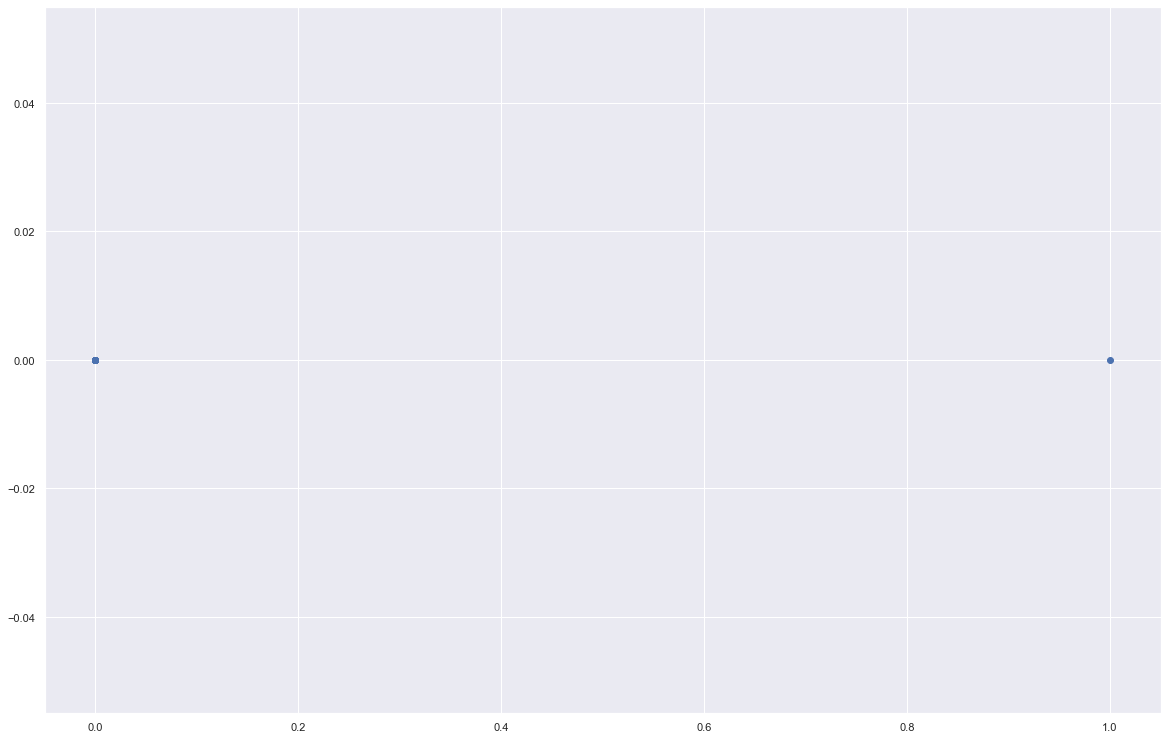

In [49]:
plt.scatter(y_test, predict)

In [50]:
sum(y_test == predict)

386

In [51]:
len(y_test)

387